### Mounting Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
svm_flag = 0

### Dataframe Enquiry


In [ ]:
train_mit = pd.read_csv("/content/drive/MyDrive/dataset processed mit bih/mitbih_train.csv")
test_mit=pd.read_csv('/content/drive/MyDrive/dataset processed mit bih/mitbih_test.csv')

comb_ds=pd.concat([train_mit, test_mit], axis=0)

In [ ]:

train_mit['y']=train_mit['y'].astype(int)
mit_train_classes=train_mit['y'].value_counts()
print(mit_train_classes)


0    72471
4     6431
2     5788
1     2223
3      641
Name: y, dtype: int64


In [ ]:
test_mit['y']=test_mit['y'].astype(int)
mit_test_classes=test_mit['y'].value_counts()
print(mit_test_classes)

0    18118
4     1608
2     1448
1      556
3      162
Name: y, dtype: int64


In [ ]:

comb_ds=pd.concat([train_mit, test_mit], axis=0)
comb_ds

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x179,x180,x181,x182,x183,x184,x185,x186,x187,y
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.0858,0.0588,0.0490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.929,0.871,0.805,0.7430,0.6510,0.5360,0.3940,0.2510,0.1400,0.1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21888,0.803,0.692,0.587,0.4470,0.3180,0.1900,0.1180,0.0777,0.1120,0.1520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000,0.967,0.620,0.3470,0.1390,0.0890,0.1040,0.1010,0.1070,0.1010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21890,0.984,0.567,0.607,0.5830,0.6070,0.5750,0.5750,0.4880,0.3930,0.2380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
comb_ds['y']=comb_ds['y'].astype(int)
mit_classes=comb_ds['y'].value_counts()
print(mit_classes)

0    90589
4     8039
2     7236
1     2779
3      803
Name: y, dtype: int64


In [ ]:
#Random Oversampling Imbalanced Datasets using resaple from slearn
from sklearn.utils import resample


#split the data set based on different classes
normal_over=(comb_ds[comb_ds['y']==0]).sample(n=18857,random_state=52)
print("Normal ECG = ",(comb_ds[comb_ds['y']==0]).sample(n=18857,random_state=52).shape)
#split class 1
a=comb_ds[comb_ds['y']==1]
print("Supraventricular Ectopic ECG = ",a.shape)
#random resample and add into dataset
a_over=resample(a,replace=True,n_samples=2779,random_state=23)
print("Supraventricular Ectopic ECG = ",a_over.shape)

b=comb_ds[comb_ds['y']==2]
print("Ventricular Ectopic ECG = ",b.shape)
b_over=resample(b,replace=True,n_samples=7236,random_state=24)
print("Ventricular Ectopic ECG = ",b_over.shape)

c=comb_ds[comb_ds['y']==3]
print("Fusion Beats = ",c.shape)
c_over=resample(c,replace=True,n_samples=803,random_state=25)
print("Fusion Beats = ",c_over.shape)

d=comb_ds[comb_ds['y']==4]
print("Unknown = ",d.shape)
d_over=resample(d,replace=True,n_samples=8039,random_state=26)
print("Unknown = ",d_over.shape)


#combine the balanced resampled classes
comb_ds_ovr=pd.concat([normal_over,a_over,b_over,c_over,d_over])
#print(comb_ds_ovr.shape)


Normal ECG =  (18857, 188)
Supraventricular Ectopic ECG =  (2779, 188)
Supraventricular Ectopic ECG =  (2779, 188)
Ventricular Ectopic ECG =  (7236, 188)
Ventricular Ectopic ECG =  (7236, 188)
Fusion Beats =  (803, 188)
Fusion Beats =  (803, 188)
Unknown =  (8039, 188)
Unknown =  (8039, 188)


### Feature Label extraction

In [ ]:
X = comb_ds_ovr.iloc[:,0:-1]
y = comb_ds_ovr.iloc[:,-1:]

In [ ]:
#X = df.iloc[:,0:-1]
#y = df.iloc[:,-1:]

Feature

In [ ]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187
8536,0.958,0.874,0.271,0.00000,0.238,0.2770,0.2830,0.2980,0.2900,0.2850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23538,1.000,0.892,0.611,0.23600,0.153,0.0903,0.0660,0.0625,0.0521,0.0521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8229,1.000,0.904,0.372,0.00000,0.180,0.1820,0.2130,0.1960,0.2040,0.2070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28719,0.991,0.892,0.477,0.00292,0.129,0.2750,0.3540,0.3680,0.3800,0.3980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33981,0.966,0.829,0.227,0.00211,0.149,0.1280,0.0758,0.0674,0.0632,0.0484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82881,0.782,0.620,0.554,0.48100,0.435,0.4500,0.5140,0.4990,0.4500,0.3030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86909,0.955,0.453,0.469,0.51800,0.535,0.5760,0.6080,0.6570,0.5960,0.4530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84985,0.910,0.863,0.798,0.75400,0.680,0.6080,0.5100,0.4400,0.3640,0.3510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83952,1.000,0.948,0.897,0.82800,0.748,0.6480,0.5390,0.4300,0.3240,0.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Label


In [ ]:
y

,y
8536,0
23538,0
8229,0
28719,0
33981,0
...,...
82881,4
86909,4
84985,4
83952,4


### Feature Engineering

#### Multi label to binary label conversion

In [ ]:
def toBinary(x):
    if x == 0: return 0;
    else: return 1;

In [ ]:
y = y['y'].apply(toBinary)
y = pd.DataFrame(data=y)



#### Feature Scaling

In [ ]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187
8536,0.958,0.874,0.271,0.00000,0.238,0.2770,0.2830,0.2980,0.2900,0.2850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23538,1.000,0.892,0.611,0.23600,0.153,0.0903,0.0660,0.0625,0.0521,0.0521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8229,1.000,0.904,0.372,0.00000,0.180,0.1820,0.2130,0.1960,0.2040,0.2070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28719,0.991,0.892,0.477,0.00292,0.129,0.2750,0.3540,0.3680,0.3800,0.3980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33981,0.966,0.829,0.227,0.00211,0.149,0.1280,0.0758,0.0674,0.0632,0.0484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82881,0.782,0.620,0.554,0.48100,0.435,0.4500,0.5140,0.4990,0.4500,0.3030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86909,0.955,0.453,0.469,0.51800,0.535,0.5760,0.6080,0.6570,0.5960,0.4530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84985,0.910,0.863,0.798,0.75400,0.680,0.6080,0.5100,0.4400,0.3640,0.3510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83952,1.000,0.948,0.897,0.82800,0.748,0.6480,0.5390,0.4300,0.3240,0.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,y
8536,0
23538,0
8229,0
28719,0
33981,0
...,...
82881,1
86909,1
84985,1
83952,1


### Splitting Data (Train-Test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
x_test.iloc[1]

x1      0.893
x2      0.854
x3      0.634
x4      0.439
x5      0.268
        ...  
x183    0.000
x184    0.000
x185    0.000
x186    0.000
x187    0.000
Name: 4704, Length: 187, dtype: float64

### LSTM / BiLSTM - NN Model- 1

### feature engineering

In [ ]:
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
X_train = x_train
X_test = x_test

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))

x_test = scaler.fit_transform(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))


In [ ]:
x_test.shape

(7543, 1, 187)

In [ ]:
print(type(x_train))
print(type(x_test))
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(30171, 2)


In [ ]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,187),activation="relu",return_sequences=True))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             64512     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 76,994
Trainable params: 76,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test,y_test))

Epoch 1/10
943/943 [==============================] - 11s 8ms/step - loss: 0.3141 - accuracy: 0.8715 - val_loss: 0.2185 - val_accuracy: 0.9159
Epoch 2/10
943/943 [==============================] - 5s 5ms/step - loss: 0.1909 - accuracy: 0.9261 - val_loss: 0.1757 - val_accuracy: 0.9311
Epoch 3/10
943/943 [==============================] - 7s 7ms/step - loss: 0.1512 - accuracy: 0.9445 - val_loss: 0.1544 - val_accuracy: 0.9438
Epoch 4/10
943/943 [==============================] - 5s 6ms/step - loss: 0.1271 - accuracy: 0.9533 - val_loss: 0.1383 - val_accuracy: 0.9494
Epoch 5/10
943/943 [==============================] - 5s 6ms/step - loss: 0.1119 - accuracy: 0.9592 - val_loss: 0.1259 - val_accuracy: 0.9537
Epoch 6/10
943/943 [==============================] - 6s 7ms/step - loss: 0.0998 - accuracy: 0.9637 - val_loss: 0.1255 - val_accuracy: 0.9539
Epoch 7/10
943/943 [==============================] - 5s 5ms/step - loss: 0.0914 - accuracy: 0.9664 - val_loss: 0.1129 - val_accuracy: 0.9604
Epoch

Train data


236/236 [==============================] - 1s 3ms/step - loss: 0.1041 - accuracy: 0.9639
Accuracy: 96.39%


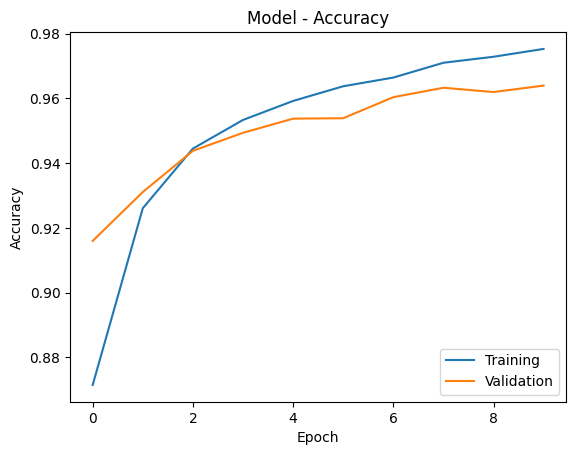

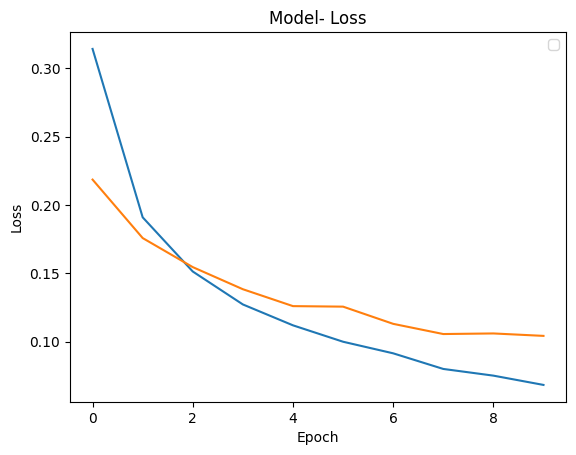

[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 

In [ ]:
#from arrhythmia classification kernel from kaggle
#evaluates the model
def evaluate_model(history,X_test_in,y_test_in,model):
    from sklearn.metrics import classification_report
    scores = model.evaluate(X_test_in,y_test_in)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    #plot epoch vs accuracy and epoch vs loss for training and validation sets    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test_in:
        y_true.append(np.argmax(element))
    print(y_true)
    prediction_proba=model.predict(X_test_in)
    prediction_proba_list = prediction_proba.tolist()
    print(prediction_proba_list)
    prediction = []
    for i in range(len(prediction_proba_list)):
      prediction.append( prediction_proba_list[i].index( max(prediction_proba_list[i]) ) )

    #prediction=np.argmax(prediction_proba,axis=1)
    print(prediction)

    cf_matrix = confusion_matrix(y_true, prediction)
    print(classification_report(y_true,prediction))
    print(cf_matrix)


evaluate_model( history , x_test , y_test , model )
 



In [ ]:
result = model.evaluate(x_train, y_train)
print("Training Loss: ",result[0])
print("Training Accuracy: ",round(result[1]*100, 2), '%')

943/943 [==============================] - 2s 2ms/step - loss: 0.0557 - accuracy: 0.9803
Training Loss:  0.055734552443027496
Training Accuracy:  98.03 %


Validation Data

In [ ]:
result = model.evaluate(x_test, y_test)
print(y_test)
print("Validation Loss: ",result[0])
print("Validation Accuracy: ",round(result[1] * 100, 2), '%')

236/236 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9639
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Validation Loss:  0.10413508117198944
Validation Accuracy:  96.39 %


Individual check

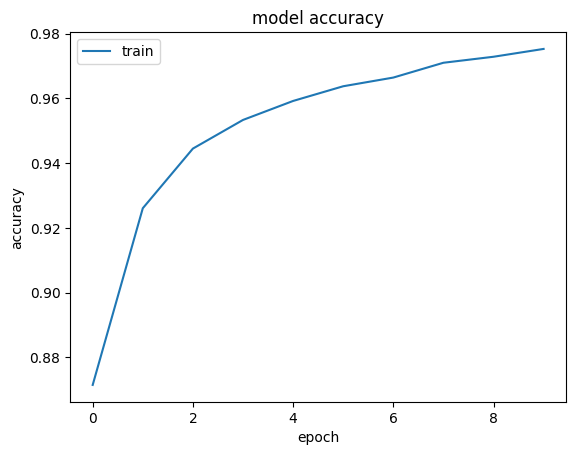

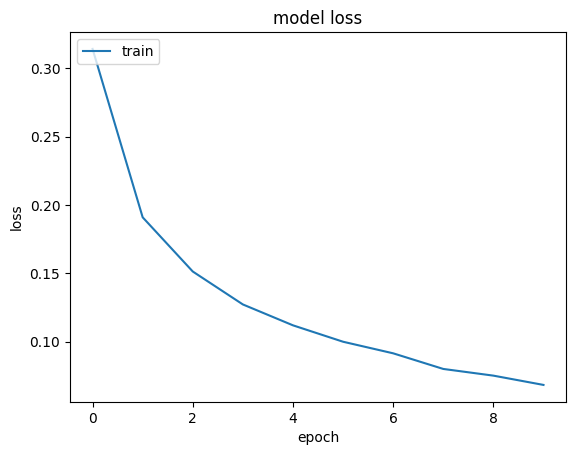

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
print(x_test[22,:])
print(y_test[22,:])

[[ 0.55077683  0.58596191  0.72922789  0.64067609  0.14163371 -0.29758212
  -0.41048346 -0.42491188 -0.42687    -0.44902187 -0.434291   -0.43270533
  -0.45191485 -0.53235959 -0.6164775  -0.69484042 -0.73369972 -0.80471602
  -0.85080948 -0.87955085 -0.91200452 -0.97983779 -1.03883078 -1.08412937
  -1.10370187 -1.20691369 -1.27041332 -1.30703408 -1.31275569 -1.36243833
  -1.39103044 -1.36387272 -1.30967253 -1.24709452 -1.1928766  -1.10207714
  -0.96720443 -0.92954203 -0.91248253 -0.85602419 -0.80039963 -0.77587614
  -0.8059619  -0.75675562 -0.70638567 -0.71415688 -0.75668366 -0.75024349
  -0.73122076 -0.7618497  -0.77137836 -0.75972544 -0.70722699 -0.72378081
  -0.72487865 -0.67166051 -0.61359838 -0.57170309 -0.5831746  -0.55340021
  -0.46747835 -0.48093659 -0.50981018 -0.4645074  -0.42624941 -0.40568542
  -0.42007486 -0.36054489 -0.27978659 -0.23475138 -0.20533396 -0.13214922
  -0.03132635 -0.0601464  -0.09926401 -0.15529467 -0.2026069  -0.25486017
  -0.35477976 -0.34771764 -0.29372932 

In [ ]:
scoreTest, accTest = model.evaluate(x_test[[44],:], y_test[[44],:])
print(round(accTest*100, 2), '%')

1/1 [==============================] - 0s 35ms/step - loss: 5.0439e-04 - accuracy: 1.0000
100.0 %


In [ ]:
print(model.predict(x_test[[44],:]))

1/1 [==============================] - 0s 22ms/step
[[2.5403710e-07 9.9999976e-01]]


In [ ]:
temp = model.predict(x_test)
print(temp.tolist())
y_pred_lstm = []
for i in temp.tolist():
  y_pred_lstm.append(i.index(max(i)))
print(y_pred_lstm)


print(temp.tolist())
y_act_lstm = []
for i in y_test.tolist():
  y_act_lstm.append(i.index(max(i)))
print(y_act_lstm)



236/236 [==============================] - 1s 2ms/step
[[2.476024576480995e-07, 0.9999997019767761], [0.9999995827674866, 3.3331389204249717e-07], [0.00010504532110644504, 0.999894917011261], [0.9999985098838806, 1.4035996400707518e-06], [0.012118878774344921, 0.987881064414978], [0.9974161982536316, 0.0025837139692157507], [0.9999971985816956, 2.7411929295340087e-06], [1.686298674030695e-05, 0.9999831318855286], [0.9931843280792236, 0.0068156542256474495], [0.9999992251396179, 7.34776165245421e-07], [0.8863652348518372, 0.11363476514816284], [4.912365625386883e-07, 0.999999463558197], [0.999802827835083, 0.00019713895744644105], [2.484104015820776e-07, 0.9999997019767761], [2.464053352468909e-07, 0.9999997019767761], [0.9998421669006348, 0.00015796950901858509], [0.9999344944953918, 6.540348113048822e-05], [2.5162398742395453e-07, 0.9999997019767761], [0.999999463558197, 5.337776656233473e-07], [2.7392201218390255e-07, 0.9999997019767761], [0.9979209899902344, 0.0020789196714758873], 

In [ ]:
cf_matrix = confusion_matrix(y_act_lstm, y_pred_lstm)

print(cf_matrix)

[[3676   98]
 [ 174 3595]]


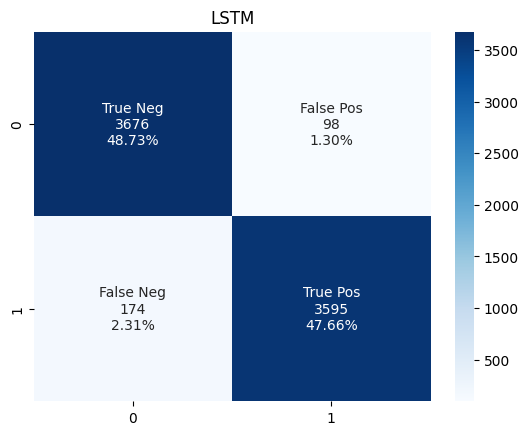

In [ ]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('LSTM')
plt.show()

In [ ]:
print(classification_report(y_act_lstm, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3774
           1       0.97      0.95      0.96      3769

    accuracy                           0.96      7543
   macro avg       0.96      0.96      0.96      7543
weighted avg       0.96      0.96      0.96      7543



[[3676   98]
 [ 174 3595]]
 Sensitivity =  0.951180684531706
 Specificity =  0.976682564917859
 Positive Predictive Value =  0.9760413830656139
 Diagonstic Odds Ratio =  816.1011610671937
 Cohen Kappa =  1.0000000012675325





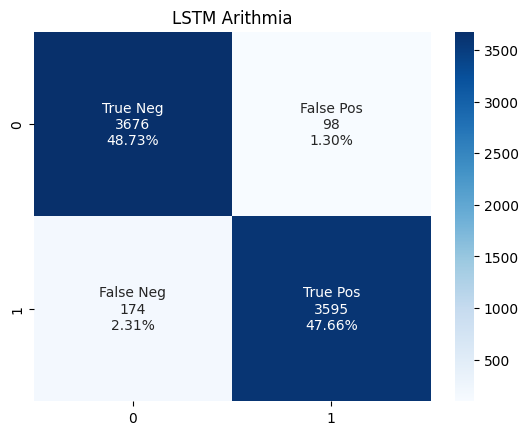

In [ ]:
def specificity(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]  
  TPR = TN/(TN+FP)

  return TPR

def positive_predictive_value(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]
  PPV = TP/(TP+FP)

  return PPV

def Diagnostic_Odds_Ratio(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]

  return (TP/FN) / (FP/TN) 

def CohenKappa(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]

  po = ( TP + TN ) /  (TP + FP + TN  + FN)
  pe = ( TN + FP ) * (TN + FN) + (FN + TP) * (FP + TP) 
  return (po-pe)/(1-pe)


def sensitivity(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]
  return TP/ ( TP+FN )


print(cf_matrix)
l1 = ['Normal', 'Arithmia']
i = []

i.append(3686)
i.append(3585)
i.append(88)
i.append(184)
print(" Sensitivity = ",sensitivity(i))
print(" Specificity = ",specificity(i))
print(" Positive Predictive Value = ",positive_predictive_value(i))
print(" Diagonstic Odds Ratio = ",Diagnostic_Odds_Ratio(i))
print(" Cohen Kappa = ",CohenKappa(i))
print("\n\n")


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('LSTM Arithmia')
plt.show()

